# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** [Devin Rivera]  
**Date:** 9/11/2025  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

In [ ]:
#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

ERROR: Error in parse(text = input): <text>:3:6: unexpected symbol
2: data_clean <- ("messy_sales_data.csv")
3: Load the
        ^


In [5]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
getwd()
setwd("/workspaces/assignment-2-version3-Gabeg56/data")
messy_sales <- read_csv("messy_sales_data.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "/workspaces/assignment-2-version3-Gabeg56/assignment/Homework"

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [7]:
# Import the messy sales dataset
messy_sales <- read_csv("messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
print("Column names:", paste(names(messy_sales), collapse = ", "))

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"


Warning message in print.default("Column names:", paste(names(messy_sales), collapse = ", ")):
“NAs introduced by coercion”


ERROR: Error in print.default("Column names:", paste(names(messy_sales), collapse = ", ")): invalid printing digits -2147483648


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [8]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

In [26]:
**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values - which columns have missing data?]

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]

3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]

4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?]

5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]

**YOUR OBSERVATIONS:**

1. [Columns 2,5, and 6 have missing data. NA in customer name, Purchase date, and a zero in the quantity column. Which should be impossible because there is a sales amount.
2. The outliers I see are in the 6th column with a zero, a negative one, and a one hundred. There is also an outlier in the amount bought. With 5000 electronics from one buyer.
3. There is an inconsistent naming convention with only one buyer being truly named (Alice) the rest NA or anonymous.
4. The sales amount is not in the right format because counting money should be to the nearest cent. The date format is not particulary wrong but I would prefer the dates be in order.
5. There is one on TransactionID 3. Negative one. ]

ERROR: Error in parse(text = input): <text>:1:1: unexpected '^'
1: **
    ^


---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [ ]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- (sapply(messy_sales, function(x) sum(is.na(x))))

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"
# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8

In [ ]:
### 2.2 Missing Value Treatment - Option A (Removal)",

Create a dataset with all missing value rows removed and compare the results.

ERROR: Error in parse(text = input): <text>:3:8: unexpected symbol
2: 
3: Create a
          ^


In [ ]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [ ]:
## Create a copy for imputation
sales_imputed_mean <- messy_sales %>%
 mutate(Sales_Imputed_Mean = ifelse(is.na(Sales_Amount),mean(Sales_Amount, na.rm = TRUE),Sales_Amount))
print("Data after imputation of missing Sales_Amount values")
print(sales_imputed_mean)
head(sales_imputed_mean, 10)

[1] "Data after imputation of missing Sales_Amount values"
# A tibble: 200 × 7
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2             2 Alice Brown   Clothing                 573. 2023-10-21   
 3             3 Jane Doe      Electronics              488. 2023-12-28   
 4             4 Jane Doe      Electronics             5000  2023-06-16   
 5             5 John Smith    Books                    344. 2023-05-05   
 6             6 John Smith    Books                    435. 2023-11-28   
 7             7 Jane Doe      Home                     489. 2023-08-17   
 8             8 Jane Doe      Electronics              537. 2023-05-17   
 9             9 Jane Doe      Clothing                 793. 2023-08-13   
10            10 Jane Doe      electronics              649. 2023-10-16   
# ℹ 190 more rows
# ℹ

TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity,Sales_Imputed_Mean
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>
1,NA,Home,362.3175,NA,2,362.3175
2,Alice Brown,Clothing,573.0791,2023-10-21,3,573.0791
3,Jane Doe,Electronics,487.6874,2023-12-28,-1,487.6874
4,Jane Doe,Electronics,5000.0000,2023-06-16,7,5000.0000
5,John Smith,Books,344.1746,2023-05-05,100,344.1746
6,John Smith,Books,434.9527,2023-11-28,4,434.9527
7,Jane Doe,Home,489.0863,2023-08-17,0,489.0863
8,Jane Doe,Electronics,536.9202,2023-05-17,7,536.9202
9,Jane Doe,Clothing,793.3933,2023-08-13,3,793.3933


In [ ]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [ ]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
mode_name <- get_mode(messy_sales$Customer_Name)
sales_imputed <- messy_sales
sales_imputed$Customer_Name[is.na(sales_imputed$Customer_Name)] <- mode_name
print(sales_imputed$Customer_Name)


  [1] "John Smith"  "Alice Brown" "Jane Doe"    "Jane Doe"    "John Smith" 
  [6] "John Smith"  "Jane Doe"    "Jane Doe"    "Jane Doe"    "Jane Doe"   
 [11] "Bob Johnson" "John Smith"  "Jane Doe"    "Alice Brown" "John Smith" 
 [16] "Bob Johnson" "Alice Brown" "John Smith"  "Jane Doe"    "Jane Doe"   
 [21] "John Smith"  "Bob Johnson" "Jane Doe"    "Jane Doe"    "Jane Doe"   
 [26] "John Smith"  "Alice Brown" "Jane Doe"    "Alice Brown" "Alice Brown"
 [31] "Jane Doe"    "John Smith"  "Bob Johnson" "Alice Brown" "John Smith" 
 [36] "Jane Doe"    "Bob Johnson" "Bob Johnson" "John Smith"  "Alice Brown"
 [41] "John Smith"  "Alice Brown" "Bob Johnson" "John Smith"  "Jane Doe"   
 [46] "John Smith"  "John Smith"  "Alice Brown" "John Smith"  "Jane Doe"   
 [51] "John Smith"  "John Smith"  "Alice Brown" "Alice Brown" "Alice Brown"
 [56] "Bob Johnson" "John Smith"  "Bob Johnson" "Bob Johnson" "Jane Doe"   
 [61] "John Smith"  "John Smith"  "John Smith"  "Bob Johnson" "Bob Johnson"
 [66] "Bob J

In [ ]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity[is.na(sales_imputed$Quantity)] <- median(sales_imputed$Quantity, na.rm = TRUE)
print(sales_imputed$Quantity)

  [1]   2   3  -1   7 100   4   0   7   3   2   5   7 100 100   2   4 100   8
 [19]   4   6   8   0   2   8   1   4 100   6   2   8  10   2   5  -1  10   0
 [37]  10   7   8   3   4   0   4   2  10   0   6  -1   1   0  -1  -1   7  -1
 [55]   4   8   4   7   1   3   2   5   5   3 100 100   0   0   9  -1 100   0
 [73]   5 100  10   6   3   0   0   2   7   0  10   3   9   5   1   2   5 100
 [91]  -1   5   5   2   2  10   5  -1  10   7 100   2   7   8   3   5  10   3
[109]  10   9   5   8   4 100   1   4   0   7   8   2   4   5   7  -1   1  10
[127]   3   7   4   8  10  10   7   1   9   2  10   0   4   7   5   6   2   0
[145]   9   6 100   7   3   5   7   9   2   8  -1   5   0  10  10 100   3  -1
[163]   0   1   1   4  -1   0   5  10 100   5   3   2   9   3  -1   7   5  10
[181]   5 100   7  10   8  -1   1   8   3  -1   7   3   2   3   7   2  10   9
[199] 100  10


In [ ]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


In [ ]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [ ]:
# Compare summary statistics
print("messy_sales$Sales_Amount")
summary(messy_sales$Sales_Amount)

[1] "messy_sales$Sales_Amount"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [ ]:
print("sales_revomed_na$Sales_Amount")
summary(sales_removed_na$Sales_Amount)

[1] "sales_revomed_na$Sales_Amount"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [ ]:
print("sales_imputed$Sales_Amount")
summary(sales_imputed$Sales_Amount)

[1] "sales_imputed$Sales_Amount"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**
Imputation because it preserves more data by adding the mean or median to the "missing" area and removing rows with values can lead to a shortage of data.

2. **What are the trade-offs between removal and imputation?**
Removal ensures that only complete and relaible date is used. However, it reduces sample size which can cause bias and skew the data. Impuratation gives a rough estimate to the missing data and can keep down bias. However it is not as reliable if the data were eliminated which can lead to misleading data.


---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [ ]:
"#### 3.1 Outlier Detection Using IQR Method
",

Apply the interquartile range method to identify outliers in Sales_Amount.

In [ ]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- Q3_sales - Q1_sales

In [ ]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales
lower_threshold <- Q1_sales - 1.5 * IQR_sales

In [ ]:
### TODO: Identify outliers
outliers <- sales_imputed %>%
    filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 6"
[1] "Outlier rows:"
# A tibble: 6 × 6
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
          <dbl> <chr>         <chr>                   <dbl> <date>       
1             4 Jane Doe      Electronics              5000 2023-06-16   
2            46 John Smith    Books                    8000 NA           
3            96 John Smith    electronics             50000 2023-09-22   
4           146 John Smith    ELECTRONICS             12000 2023-01-22   
5           167 Bob Johnson   Electronics            100000 2023-09-18   
6           177 Jane Doe      ELECTRONICS             25000 2023-08-03   
# ℹ 1 more variable: Quantity <dbl>


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


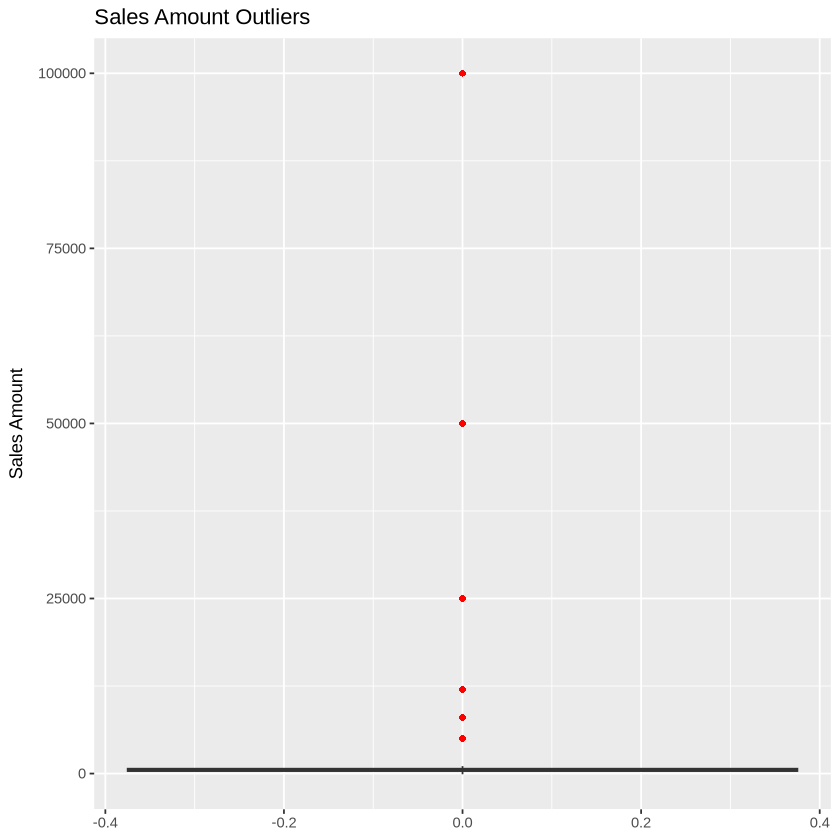

In [ ]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y= Sales_Amount)) +
    geom_boxplot(outlier.colour = "red", outlier.shape = 16) +
    ggtitle("Sales Amount Outliers") +
    ylab("Sales Amount")


# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [ ]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
    filter(Sales_Amount <= lower_threshold & Sales_Amount <= upper_threshold)


print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 0"
[1] "Rows removed: 200"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

sales_outliers_capped <- sales_imputed
 Sales_outliers_capped$Sales_Amount <- ifelse(
    ifelse(sales_outliers_capped$Sales_Amount < upper_threshold, upper_threshold, 
     sales_outliers_capped$Sales_Amount)
 )

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message in geom_boxplot(outlier.colour = "red", outier.shape = 16):
“Ignoring unknown parameters: `outier.shape`”
Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


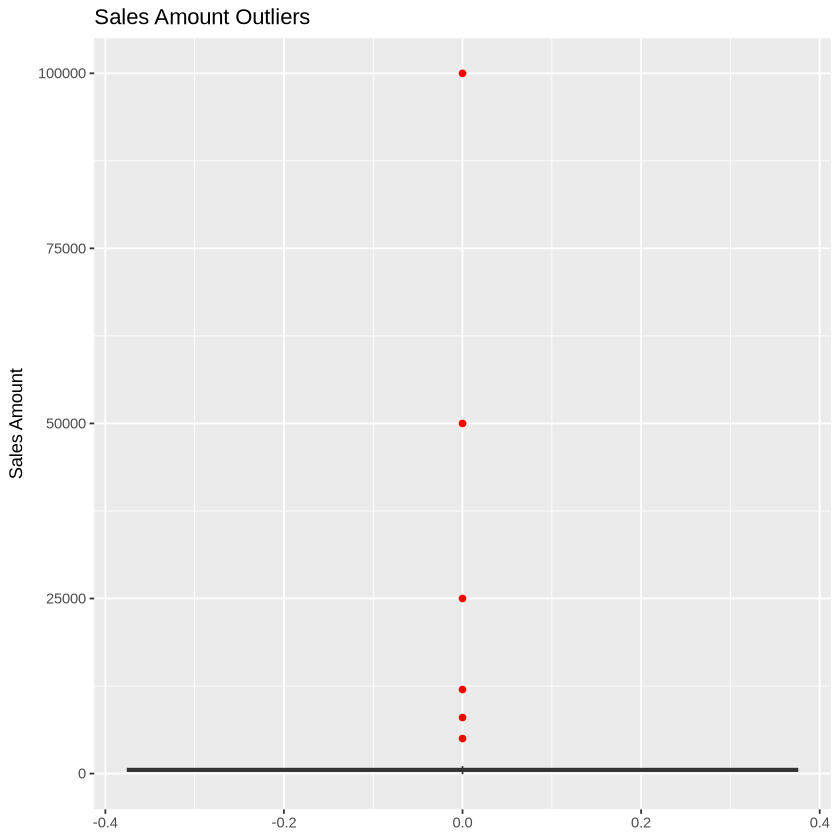

In [31]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y=Sales_Amount)) +
    geom_boxplot(outlier.colour = "red", outier.shape = 16) +
    ggtitle("Sales Amount Outliers") +
    ylab("Sales Amount")
# Hint: ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [33]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
    filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


In [34]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed
sales_outliers_capped$Sales_Amount <- ifelse(
    sales_outliers_capped$Sales_Amount < lower_threshold, lower_threshold,
    ifelse(sales_outliers_capped$Sales_Amount > upper_threshold, upper_threshold,
              sales_outliers_capped$Sales_Amount)
)

In [35]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(
    sales_outliers_capped$Sales_Amount < lower_threshold, lower_threshold,
    ifelse(sales_outliers_capped$Sales_Amount > upper_threshold, upper_threshold,
              sales_outliers_capped$Sales_Amount) 
)
### Hint: Use ifelse() to replace values above/below thresholds

In [36]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1] -100.000 1192.331


In [37]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>%
    filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 0"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [38]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -100.0   362.6   531.3   531.5   694.5  1192.3      22 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

There where no missing values, no outliers, a maximum sample size and it seemed the most ready of all the datasets to be analyzed. It was also the dataset I felt most confident in while doing this assignment.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [39]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric  Original_Data     Final_Data
1      Number of Rows            200            200
2      Missing Values             52             36
3   Mean Sales_Amount        1614.91          531.5
4 Median Sales_Amount         531.29         531.29
5            Outliers Check manually Check manually


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

Its extremely important to remove rows with missing values when the data is critical to the analysis and cannot be estimated. For example, when dealing with financial transactions, missing values in key fields like an amount or date cannot be estimated and if estimated could likely lead to a misrepresentation of the data.

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

Outliers like in a sales amount could mean a large or small purchase. Another case it could represent is it could mean that there is an error in the data. They should not always be removed in case the data is correct then in some situations it could be important to keep them in the data. In this case if it is obvious it is an error, the is should be imputed or removed entirely.
### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

When calculating average sales, missing values or outliers can skew the data, leading to inaccurate averages that do not reflect true performance. For identifying top-performing products, missing values can result in wrong reporting of sales figures, while outliers can create wrong impressions of product success. In forecasting future sales, both missing values and outliers can throw off the data, leading to unreliable predictions.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

Analysts should record and document the data they removed or modify and why they did it. This way if someone else were to look at the data they would know what was done and why. This ensures transparency and maintains data integrity.

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**